<a href="https://colab.research.google.com/github/hargurjeet/hpe/blob/main/Problem_2_hpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HPE ML & EDA Problem** 

## INSTRUCTIONS
An ML dataset is given.
- Do an EDA to show some insights across independent variables(V1, V2, ..) & response variable (Y in Column A) 
- Include the EDA insights/results in a presentable format (Slides)
- Predict for the response variable (Y in Column A) 

- Please include R/Python Code as well

# **Table Of Contents**<a name="top"></a>


---



---


  1. [Loading the dataset Preprocessing](#1)
  2. [Explainatory Data Analysis](#2)
  3. [Building ML Pipelines](#3)
  4. [Selecting and Training the models](#4)
  5. [Hyperparameterization](#5)
  6. [Making the predictions](#6)


# 1: Loading the dataset & Preprocessing <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [1]:
## Importing all the requeired libraries

# For data preprocessing
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTENC

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import pylab

# Librareis for building pipelines
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# To build ML models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/hpe/main/Problem2.csv')
df.head()

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,"9,111",0.0,0.0,0.343088,0.0,100.4014,100.6104,0.04,0.551271,3.361059
1,"10,918",0.0,0.0,0.343088,0.0,100.5697,100.7629,0.04,0.551271,3.361059
2,"13,402",0.0,0.0,0.343088,0.0,100.7521,100.8958,0.04,0.551271,3.361059
3,"11,530",0.0,0.0,0.357665,0.0,100.9278,101.0110,0.04,0.556536,3.559978
4,"9,972",0.0,0.0,0.357665,0.0,101.0532,101.1080,0.04,0.556536,3.559978


In [3]:
## Seprating the traing and the test set
df_training = df.iloc[:144, :]
df_test = df.iloc[144:147, :]

In [4]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       144 non-null    object 
 1   V1      144 non-null    float64
 2   V2      144 non-null    float64
 3   V3      144 non-null    float64
 4   V4      144 non-null    float64
 5   V5      144 non-null    float64
 6   V6      144 non-null    float64
 7   V7      144 non-null    float64
 8   V8      144 non-null    float64
 9   V9      144 non-null    float64
dtypes: float64(9), object(1)
memory usage: 11.4+ KB


In [5]:
# as target variable is number, Coverting Y to numberic
df_training['Y'] = df_training['Y'].str.replace(',', '').astype(float)
df_training['Y'].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       9111.0
1      10918.0
2      13402.0
3      11530.0
4       9972.0
        ...   
139     6194.0
140     9575.0
141    10565.0
142     9097.0
143     9866.0
Name: Y, Length: 144, dtype: float64

In [6]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       144 non-null    float64
 1   V1      144 non-null    float64
 2   V2      144 non-null    float64
 3   V3      144 non-null    float64
 4   V4      144 non-null    float64
 5   V5      144 non-null    float64
 6   V6      144 non-null    float64
 7   V7      144 non-null    float64
 8   V8      144 non-null    float64
 9   V9      144 non-null    float64
dtypes: float64(10)
memory usage: 11.4 KB


In [7]:
df_training.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,144.0,9872.597222,2995.146872,128.000000,8347.500000,10076.500000,11674.000000,17892.000000
V1,144.0,38.516667,26.252747,0.000000,0.000000,53.500000,56.850000,66.900000
V2,144.0,0.091540,0.087627,0.000000,0.015592,0.043288,0.176864,0.264827
V3,144.0,0.270869,0.069505,0.120897,0.216147,0.299312,0.327257,0.358630
V4,144.0,0.076968,0.070805,0.000000,0.014333,0.057803,0.134171,0.235520
V5,144.0,100.128055,1.201104,96.322000,99.737398,100.324900,100.992850,101.778600
V6,144.0,100.158992,1.292624,96.105030,99.764295,100.280550,100.957400,102.174800
V7,144.0,0.029583,0.028820,-0.060000,0.017500,0.040000,0.050000,0.090000
V8,144.0,0.611368,0.037454,0.551271,0.588272,0.599102,0.640697,0.698619
V9,144.0,1.235073,2.121108,-5.418855,0.412458,1.930578,2.486848,3.559978


# 2: Explainatory Data Analysis <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## 2.1 Visualizing all the features and Target feature

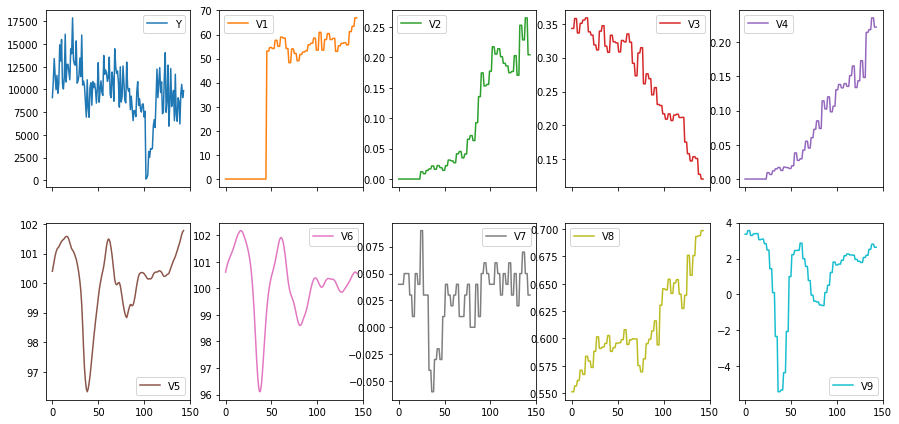

In [8]:
df_training.plot(subplots=True, layout=(4,5), figsize=(15,15));

## 2.2 Key insights

Finding and understanding the co relations between basic feature linkages

In [9]:
corr = df_training.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9
Y,1.00,-0.43,-0.58,0.48,-0.49,0.18,0.27,-0.06,-0.46,0.12
V1,-0.43,1.00,0.69,-0.68,0.72,0.14,0.02,0.24,0.62,0.16
V2,-0.58,0.69,1.00,-0.95,0.97,0.18,-0.07,0.40,0.89,0.19
V3,0.48,-0.68,-0.95,1.00,-0.97,-0.17,0.10,-0.33,-0.92,-0.17
V4,-0.49,0.72,0.97,-0.97,1.00,0.19,-0.09,0.36,0.91,0.18
V5,0.18,0.14,0.18,-0.17,0.19,1.00,0.92,0.75,0.18,0.95
V6,0.27,0.02,-0.07,0.10,-0.09,0.92,1.00,0.64,-0.06,0.90
V7,-0.06,0.24,0.40,-0.33,0.36,0.75,0.64,1.00,0.26,0.77
V8,-0.46,0.62,0.89,-0.92,0.91,0.18,-0.06,0.26,1.00,0.15
V9,0.12,0.16,0.19,-0.17,0.18,0.95,0.90,0.77,0.15,1.00


- Feature v3 and v4 seems to inversely proportional to each other
- Feature v5, v6 and v9 are closely co related. Hence stroge +ve co realtion


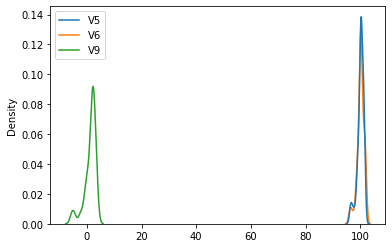

In [10]:
sns.kdeplot(data=df_training[['V5', 'V6', 'V9']]);

V5 and V6 seems to be overlapping and we may choose on select one of them instead of both the features

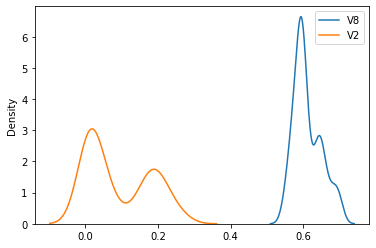

In [11]:
sns.kdeplot(data=df_training[['V8', 'V2']]);

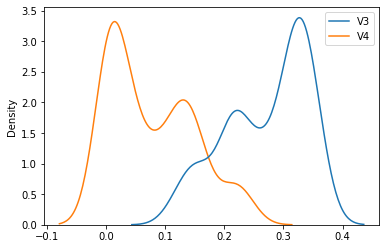

In [12]:
sns.kdeplot(data=df_training[['V3', 'V4']]);

Both v3 and v4 are very identical and seems to be mirror image of each other. V3 is left skewed whereas v4 is right skewed

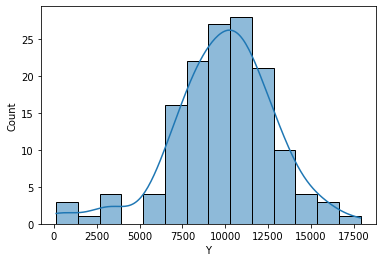

In [37]:
sns.histplot(data=df_training, x="Y", kde=True);

The target columns seems to be following normal distribution

# 3: Building ML Pipelines <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [13]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']

In [14]:
X = df_training[features]
y = df_training.Y
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
sample_incomplete_rows = df_training[df_training.isnull().any(axis=1)].head()
sample_incomplete_rows

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9


In [16]:
## Building ML pipeline
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values = np.nan, strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data, as the dataset doesnt have categorical columns there is no need to build categrocial transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features)
    ])

data_prepared = preprocessor.fit_transform(X_train)
data_prepared

array([[ 8.21777082e-01,  1.20469542e+00, -7.44186294e-01,
         7.65801945e-01,  2.40963210e-01,  2.40147555e-01,
         5.65836335e-02,  9.53183851e-01,  5.26441222e-01],
       [-1.49482459e+00, -8.25022381e-01,  9.18417657e-01,
        -8.69910056e-01, -2.31249609e+00, -1.73460541e+00,
        -1.64092537e+00, -6.44826833e-01, -2.46189599e+00],
       [ 7.45068417e-01,  1.03229274e+00, -7.95576769e-01,
         1.17875073e+00,  2.83112411e-01,  2.11110321e-01,
         3.96085434e-01,  6.92078838e-01,  4.96020958e-01],
       [ 6.64524319e-01,  1.22276130e+00, -1.54791582e+00,
         1.28692379e+00,  2.29627629e-01, -1.45270290e-01,
         7.35587235e-01,  1.59846508e+00,  3.11846182e-01],
       [ 7.48903850e-01,  6.88043075e-01, -5.45201698e-01,
         3.64624360e-01,  2.41282522e-01,  2.16826312e-01,
         7.35587235e-01,  4.33220768e-01,  3.22992010e-01],
       [ 7.64245583e-01, -7.71584581e-01,  9.45856021e-01,
        -7.01730201e-01,  1.09592145e+00,  1.418556

# 4: Selecting and Training the models <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## 4.1 Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, y_train)

LinearRegression()

In [18]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [5758.91818373 9818.26859807 8555.852473   8142.56666657 7174.158139  ]
Labels: [6673.0, 10738.0, 9673.0, 5957.0, 7886.0]


In [19]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2123.4320792944495

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, predictions)
lin_mae

1674.1945519477983

## 4.2 Decison Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Decision tree seems to be over fitting

## 4.3 Random forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, y_train)

predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

787.9074557643645

In [24]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
forest_scores = cross_val_score(forest_reg, data_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2273.49876766 2214.88547164 2355.75236964]
Mean: 2281.378869644784
Standard deviation: 57.77798163974908


As random forests seems to be performing better. Let us find the best parameters for the same.

# 5: Hyperparameterization <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## GridSerach CV


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [27]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [28]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2543.18701926522 {'max_features': 2, 'n_estimators': 3}
2290.505102226292 {'max_features': 2, 'n_estimators': 10}
2171.4331782068516 {'max_features': 2, 'n_estimators': 30}
2472.5780894867426 {'max_features': 4, 'n_estimators': 3}
2340.525663838485 {'max_features': 4, 'n_estimators': 10}
2211.529692828832 {'max_features': 4, 'n_estimators': 30}
2460.051340311762 {'max_features': 6, 'n_estimators': 3}
2338.19714427822 {'max_features': 6, 'n_estimators': 10}
2220.0185122232106 {'max_features': 6, 'n_estimators': 30}
2359.84722079278 {'max_features': 8, 'n_estimators': 3}
2292.2488957259225 {'max_features': 8, 'n_estimators': 10}
2164.338849629575 {'max_features': 8, 'n_estimators': 30}
2425.6663070564823 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2360.64615188263 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2518.6121809038045 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2366.67356606061 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# 6: Making the predictions <a name="**6**"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Making prediciton on the test set.

In [29]:
df_test

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9
144,?,67.0,0.212043,0.123172,0.216391,101.7656,100.4836,0.04,0.688172,2.394371
145,?,67.0,0.212043,0.123172,0.216391,101.6869,100.3605,0.04,0.688172,2.394371
146,?,67.0,0.212043,0.123172,0.216391,101.5832,100.2126,0.04,0.688172,2.394371


In [30]:
X_test = df_test.drop("Y", axis=1)
y_test = df_test["Y"].copy()

In [31]:
final_model = grid_search.best_estimator_
X_test_prepared = preprocessor.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

print(f'Final Predicitons {final_predictions}')

Final Predicitons [7973.2        7707.83333333 7541.16666667]


# **The END**